In [297]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import r2_score
sns.set()
pd.set_option('max_columns', 1000)
warnings.filterwarnings('ignore')
%matplotlib inline
from missingpy import MissForest
from sklearn.ensemble import RandomForestRegressor

In [298]:
df=pd.read_csv('Data/train.csv')
df_test=pd.read_csv('Data/test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [299]:
df.shape

(1460, 81)

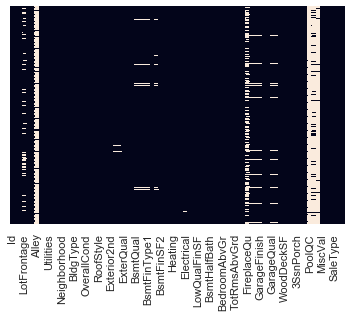

In [491]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [300]:
# Concating or joining the train and test data together for removing null values and converting the categorical values to numeric.
df1=pd.concat([df,df_test],axis=0,ignore_index=True)
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,

In [301]:
df1.shape

(2919, 81)

In [302]:
# created the new dataframe  with signle column 'SalePrice' before removing the "SalePrice" column from df1 dataframe to deal with null values.
df2=df1[['SalePrice']]
df2

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
...,...
2914,NaN
2915,NaN
2916,NaN
2917,NaN


In [303]:
#list(df)

In [304]:
# Checking the columns with large number of null values
df1.isna().sum().nlargest(10)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
dtype: int64

In [305]:
top_nullcolumns = df1.isna().sum().nlargest(6).index.values.tolist()

In [306]:
top_nullcolumns

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'SalePrice', 'FireplaceQu']

In [307]:
# Droping the columns with large number of null values
df1.drop(top_nullcolumns,axis=1,inplace =True)

In [308]:
# Filling the null values with the mean value of that respective column
df1.fillna(df1.mean(),inplace=True)

In [309]:
categorical_columns = df1.isna().sum().nlargest(18).index.values.tolist()

In [310]:
# Filling the null categorical values with mode value of that respective column
for catcol in categorical_columns:
    df1[catcol]=df1[catcol].fillna(df1[catcol].mode()[0])

In [311]:
df1.isna().sum().sum()

0

In [493]:
#sns.heatmap(df1.isnull(),yticklabels=False,cbar=False)

In [312]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.000000,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.000000,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.000000,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.000000,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.000000,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,Attchd,1978.113406,Unf,0.0,0.0,TA,TA,Y,0,0,0,0,0,0,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,CarPort,1970.000000,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd,1960.000000,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,Attchd,1978.113406,Unf,0.0,0.0,TA,TA,Y,80,32,0,0,0,0,700,7,2006,WD,N

In [313]:
#list(df1)

In [314]:
len(df1.columns)

75

In [315]:
# Identifying the categorical columns based on data type "object"
catogorical_columns_new = df1.select_dtypes(include=['object']).copy()
catogorical_columns_new

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2915,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Abnorml
2916,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
2917,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [316]:
#print(catogorical_columns.isnull().sum())

In [317]:
#print(catogorical_columns['MSZoning'].value_counts())

In [318]:
# Changing the categorical columns data type from 'object' to 'category'
for column in catogorical_columns_new:
    catogorical_columns_new[column] = catogorical_columns_new[column].astype('category')
    

In [319]:
# By using the label encoder technique the categorical values are converted into numeric value
for column in catogorical_columns_new:
    catogorical_columns_new[column] = catogorical_columns_new[column].cat.codes
    

In [320]:
catogorical_columns_new

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,4,1,3,3,0,4,0,10,2,2,3,5,1,1,5,5,2,3,4,1,3,3,3,5,5,1,2,1,4,3,6,1,2,4,4,2,8,4
2915,4,1,3,3,0,4,0,10,2,2,4,5,1,1,5,5,2,3,4,1,3,3,3,4,5,1,4,1,4,3,6,4,2,4,4,2,8,0
2916,3,1,3,3,0,4,0,11,2,2,0,2,1,1,12,13,2,3,4,1,3,3,3,0,5,1,0,1,4,3,6,5,2,4,4,2,8,0
2917,3,1,3,3,0,4,0,11,2,2,0,6,1,1,6,15,2,3,4,2,2,3,0,2,5,1,4,1,4,3,6,1,2,4,4,2,8,4


In [321]:
# A new dataframe df3 is created by deleting categorical columns from dataframe df1
df3=df1.drop(columns=df1.select_dtypes(include=['object']))
df3

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.000000,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.000000,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.000000,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.000000,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.000000,3.0,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,1978.113406,0.0,0.0,0,0,0,0,0,0,0,6,2006
2915,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.000000,1.0,286.0,0,24,0,0,0,0,0,4,2006
2916,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.000000,2.0,576.0,474,0,0,0,0,0,0,9,2006
2917,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,1978.113406,0.0,0.0,80,32,0,0,0,0,700,7,2006


In [322]:
df4=pd.concat([df3,catogorical_columns_new],axis=1)
df4

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.000000,2.0,548.0,0,61,0,0,0,0,0,2,2008,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.000000,2.0,460.0,298,0,0,0,0,0,0,5,2007,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.000000,2.0,608.0,0,42,0,0,0,0,0,9,2008,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.000000,3.0,642.0,0,35,272,0,0,0,0,2,2006,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.000000,3.0,836.0,192,84,0,0,0,0,0,12,2008,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,1978.113406,0.0,0.0,0,0,0,0,0,0,0,6,2006,4,1,3,3,0,4,0,10,2,2,3,5,1,1,5,5,2,3,4,1,3,3,3,5,5,1,2,1,4,3,6,1,2,4,4,2,8,4
2915,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.000000,1.0,286.0,0,24,0,0,0,0,0,4,2006,4,1,3,3,0,4,0,10,2,2,4,5,1,1,5,5,2,3,4,1,3,3,3,4,5,1,4,1,4,3,6,4,2,4,4,2,8,0
2916,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.000000,2.0,576.0,474,0,0,0,0,0,0,9,2006,3,1,3,3,0,4,0,11,2,2,0,2,1,1,12,13,2,3,4,1,3,3,3,0,5,1,0,1,4,3,6,5,2,4,4,2,8,0
2917,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,1978.113406,0.0,0.0,80,32,0,0,0,0,700,7,2006,3,1,3,3,0,4,0,11,2,2,0,6,1,1,6,15,2,3,4,2,2,3,0,2,5,1,4,1,4,3,6,1,2,4,4,2,8,4


In [323]:
df5=pd.concat([df4,df2],axis=1)
df5

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.000000,2.0,548.0,0,61,0,0,0,0,0,2,2008,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.000000,2.0,460.0,298,0,0,0,0,0,0,5,2007,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.000000,2.0,608.0,0,42,0,0,0,0,0,9,2008,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.000000,3.0,642.0,0,35,272,0,0,0,0,2,2006,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.000000,3.0,836.0,192,84,0,0,0,0,0,12,2008,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,1978.113406,0.0,0.0,0,0,0,0,0,0,0,6,2006,4,1,3,3,0,4,0,10,2,2,3,5,1,1,5,5,2,3,4,1,3,3,3,5,5,1,2,1,4,3,6,1,2,4,4,2,8,4,NaN
2915,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.000000,1.0,286.0,0,24,0,0,0,0,0,4,2006,4,1,3,3,0,4,0,10,2,2,4,5,1,1,5,5,2,3,4,1,3,3,3,4,5,1,4,1,4,3,6,4,2,4,4,2,8,0,NaN
2916,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.000000,2.0,576.0,474,0,0,0,0,0,0,9,2006,3,1,3,3,0,4,0,11,2,2,0,2,1,1,12,13,2,3,4,1,3,3,3,0,5,1,0,1,4,3,6,5,2,4,4,2,8,0,NaN
2917,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,1978.113406,0.0,0.0,80,32,0,0,0,0,700,7,2006,3,1,3,3,0,4,0,11,2,2,0,6,1,1,6,15,2,3,4,2,2,3,0,2,5,1,4,1,4,3,6,1,2,4,4,2,8,4,NaN


In [ ]:
#df5.to_csv(r"C:\Users\DELL PC\Final project\sample_data_file.csv", index=False)

In [325]:
df5.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'Kitc

In [527]:
from sklearn.model_selection import train_test_split
df_Train=df5.iloc[:1460,:]
df_Test=df5.iloc[1460:,:]
#X = df_Train.drop(['SalePrice'],axis=1)
#y = df_Train["SalePrice"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [528]:
df_Train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,953.0,953.0,953,694,0,1647,0.0,0.0,2,1,3,1,7,1,1999.0,2.0,460.0,0,40,0,0,0,0,0,8,2007,3,1,3,3,0,4,0,8,2,2,0,5,1,1,12,13,2,3,4,2,2,3,3,5,5,1,0,1,4,3,6,1,1,4,4,2,8,4,175000.0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,589.0,1542.0,2073,0,0,2073,1.0,0.0,2,0,3,1,7,2,1978.0,2.0,500.0,349,0,0,0,0,0,0,2,2010,3,1,3,3,0,4,0,14,2,2,0,2,1,1,9,10,3,3,4,1,2,3,3,0,4,1,4,1,4,3,2,1,2,4,4,2,8,4,210000.0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,877.0,1152.0,1188,1152,0,2340,0.0,0.0,2,0,4,1,9,2,1941.0,1.0,252.0,0,60,0,0,0,0,2500,5,2010,3,1,3,3,0,4,0,6,2,2,0,5,1,1,5,5,2,0,2,4,3,1,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,266500.0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,0.0,1078.0,1078,0,0,1078,1.0,0.0,1,0,2,1,5,0,1950.0,1.0,240.0,366,0,112,0,0,0,0,4,2010,3,1,3,3,0,4,0,12,2,2,0,2,3,1,8,8,2,3,4,1,3,3,2,2,4,1,2,1,0,2,6,1,2,4,4,2,8,4,142125.0


In [503]:
#df_Train.shape,df_Test.shape

In [529]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [530]:
X_test=df_Test.drop(['SalePrice'],axis=1)
y_test=df_Test['SalePrice']

In [531]:
y_test.shape

(1459,)

## RandomForest

In [532]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [336]:
y_pred = model.predict(X_test)
y_pred

array([129552.75, 157967.5 , 182765.46, ..., 156908.62, 114067.  ,
       227263.24])

In [525]:
#r2_score(y_test, y_pred)

In [341]:
model.feature_importances_

array([4.59837905e-03, 1.67849888e-03, 6.14897750e-03, 1.28760197e-02,
       5.79301994e-01, 4.09892254e-03, 8.87466000e-03, 6.80133925e-03,
       5.46672003e-03, 2.96646580e-02, 6.32409794e-04, 4.09378105e-03,
       3.80068326e-02, 2.37834859e-02, 2.95944690e-02, 9.01887017e-05,
       1.11799189e-01, 6.04487732e-04, 7.78869282e-04, 7.92492515e-03,
       1.37715143e-03, 1.71672749e-03, 3.87874702e-04, 6.98916678e-03,
       3.63408984e-03, 4.16155393e-03, 2.44573447e-02, 1.30120385e-02,
       4.56941502e-03, 5.03633515e-03, 7.23059713e-04, 3.85841801e-04,
       9.60270092e-04, 1.42627126e-04, 5.60633926e-05, 3.03808376e-03,
       1.36926177e-03, 2.28366775e-03, 6.57007825e-06, 1.24356720e-03,
       1.25751275e-03, 0.00000000e+00, 8.65392779e-04, 5.24733662e-04,
       6.77461888e-03, 6.01084625e-04, 4.70820982e-04, 4.10548918e-04,
       5.74044231e-04, 5.70150660e-04, 5.21849754e-04, 1.67276846e-03,
       1.45568651e-03, 1.38546904e-03, 1.97708832e-03, 4.74595620e-04,
      

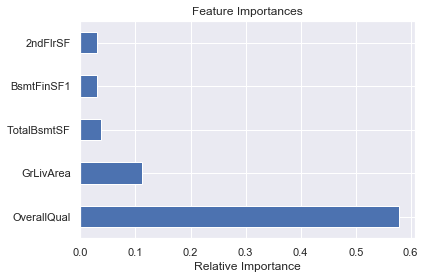

In [357]:
# Feature Importance Plot

#features= X_test.columns
#importances = model.feature_importances_
#indices = np.argsort(importances)

plt.title('Feature Importances')
plt.xlabel('Relative Importance')
feat_importances = pd.Series(model.feature_importances_, index=X_test.columns)
feat_importances.nlargest(5).plot(kind='barh')

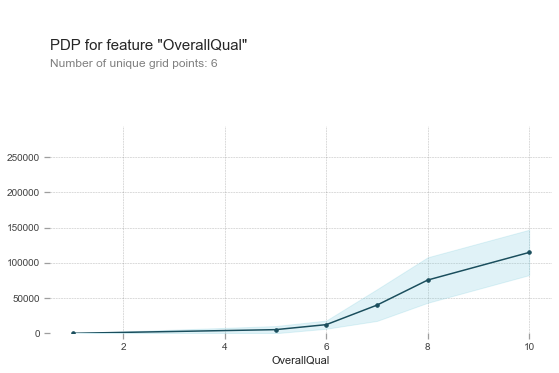

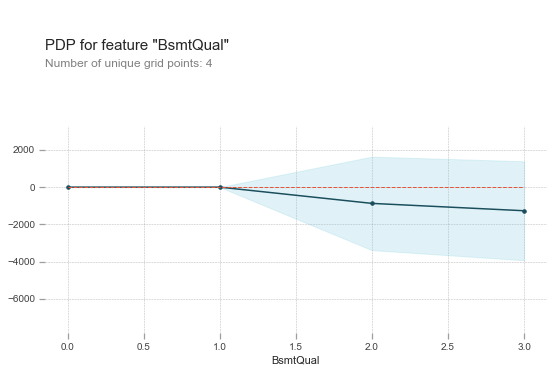

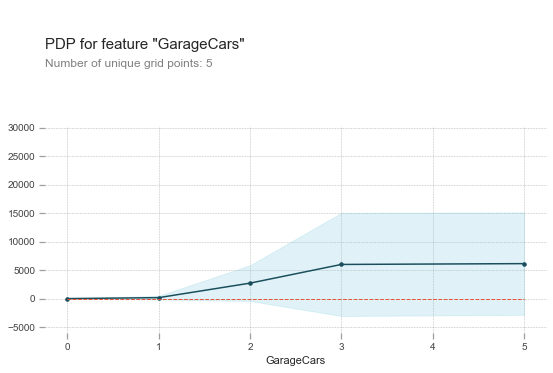

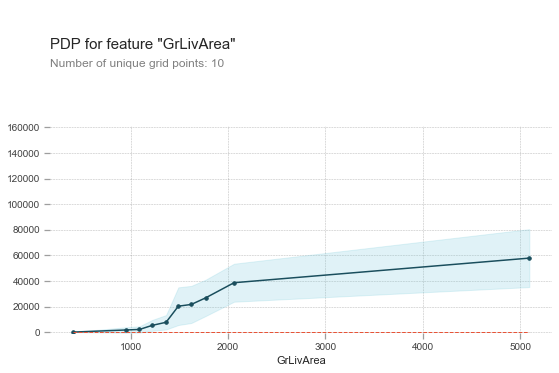

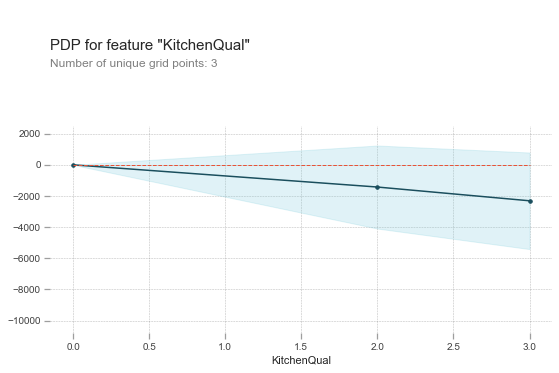

In [481]:
# Partial Dependency Plots

from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
features=["OverallQual","BsmtQual","GarageCars","GrLivArea","KitchenQual"]
for feature in features:  
# Create the data that we will plot
    pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X_test.columns, feature=feature)

    # plot it
    pdp.pdp_plot(pdp_goals, feature, figsize=(9,6))
    plt.show()

In [409]:
# Hyperparameter Tuning Using Random SearchCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score

x= X_train
y= y_train

 # Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 50, num = 5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 15, num = 1)]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
#oob_score = [True, False]
# Create the random grid
#randomstate = [0]
random_grid = {'n_estimators': n_estimators,'max_features':  max_features,'max_depth': max_depth,
              'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor()
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10,random_state=42)
# Fit the random search model
rf_random.fit(x,y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [10, 231, 452, 673, 894, 1115, 1336, 1557, 1778, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 14, 26, 38, 50], 'min_samples_leaf': [1]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [410]:
rf_random.best_params_

{'n_estimators': 1115,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40}

In [414]:
# Best Parameters for tuning the model
params={'n_estimators': 1115,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40}

In [416]:
model1=RandomForestRegressor(random_state=42,**params)
model1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1115, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [417]:
y_pred_after_tuning = model1.predict(X_test)
y_pred_after_tuning

array([127178.88161435, 153369.45560538, 182262.66367713, ...,
       162055.27533632, 119004.37219731, 231161.24932735])

In [ ]:
#r2_score(y_test, y_pred_after_tuning)

In [418]:
model1.feature_importances_

array([5.25634123e-03, 5.01008118e-03, 1.28060367e-02, 2.60252333e-02,
       1.17717156e-01, 4.86662501e-03, 4.85088046e-02, 2.18021034e-02,
       1.48977501e-02, 2.62452124e-02, 1.23266266e-03, 7.69484631e-03,
       6.19777015e-02, 5.26663457e-02, 3.03677220e-02, 4.94575056e-04,
       8.51828196e-02, 3.32271529e-03, 9.54670025e-04, 2.54668978e-02,
       4.10055615e-03, 6.23263125e-03, 1.14270512e-03, 2.12485017e-02,
       1.83494290e-02, 2.72607001e-02, 6.78844140e-02, 4.96019817e-02,
       7.67057906e-03, 1.22972113e-02, 1.42123744e-03, 2.88451033e-04,
       1.88910634e-03, 1.63232729e-03, 2.74304828e-04, 4.45384426e-03,
       2.49223280e-03, 2.83076798e-03, 9.96419365e-05, 2.10520826e-03,
       2.30956945e-03, 2.92275867e-06, 1.76302349e-03, 1.53755303e-03,
       9.42914163e-03, 1.24257915e-03, 2.90398276e-04, 1.70732144e-03,
       3.62579040e-03, 3.40240418e-03, 2.05630954e-03, 3.97615587e-03,
       3.56822048e-03, 2.26706585e-03, 4.73013833e-02, 1.07053481e-03,
      

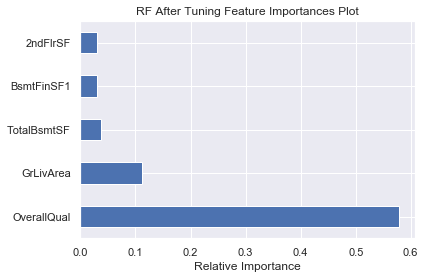

In [419]:
# Feature Importance Plot


plt.title('RF After Tuning Feature Importances Plot')
plt.xlabel('Relative Importance')
feat_importances = pd.Series(model.feature_importances_, index=X_test.columns)
feat_importances.nlargest(5).plot(kind='barh')

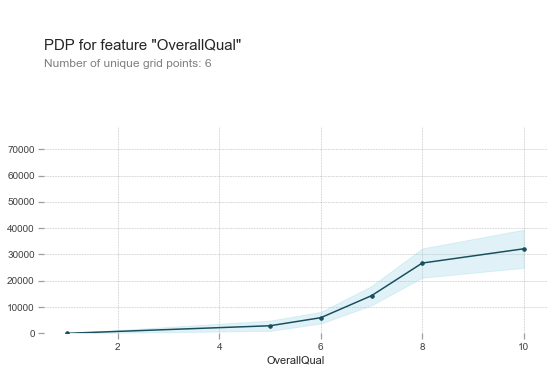

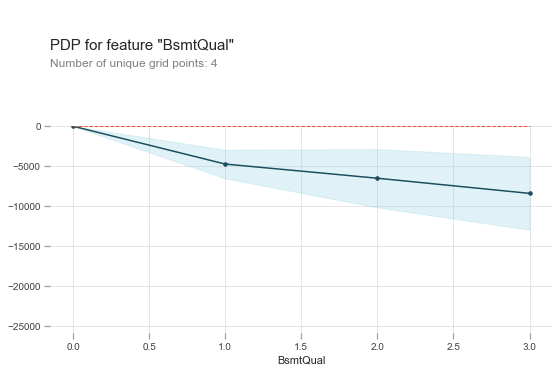

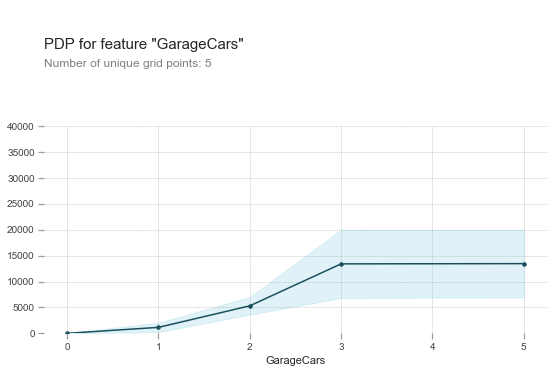

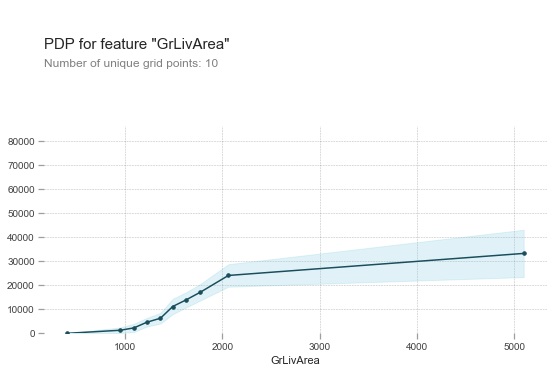

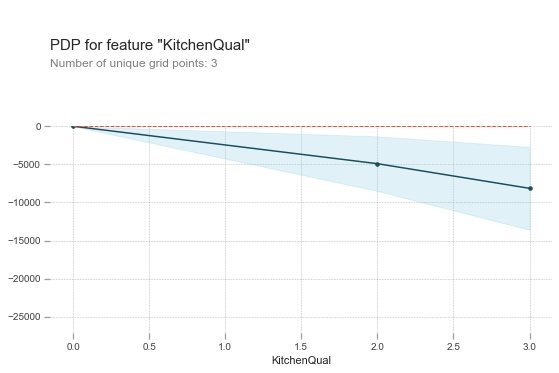

In [482]:
# Partial Dependency Plots

from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
features=["OverallQual","BsmtQual","GarageCars","GrLivArea","KitchenQual"]
for feature in features:  
# Create the data that we will plot
    pdp_goals = pdp.pdp_isolate(model=model1, dataset=X_test, model_features=X_test.columns, feature=feature)

    # plot it
    pdp.pdp_plot(pdp_goals, feature, figsize=(9,6))
    plt.show()

## XG Boost

In [420]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import pickle

In [423]:
classifier=xgboost.XGBRegressor()
regressor=xgboost.XGBRegressor()

In [424]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [426]:
XGB_y_pred=regressor.predict(X_test)

In [427]:
XGB_y_pred

array([119981.75, 149717.02, 175973.66, ..., 172063.3 , 110234.72,
       194560.66], dtype=float32)

In [ ]:
#r2_score(y_test, XGB_y_pred)

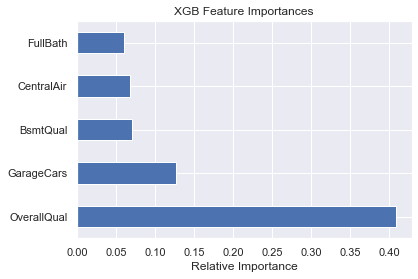

In [428]:
# Feature Importance Plot

plt.title('XGB Feature Importances')
plt.xlabel('Relative Importance')
feat_importances = pd.Series(regressor.feature_importances_, index=X_test.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [483]:
feat_importances.nlargest(5)

OverallQual    0.216184
BsmtQual       0.167257
GarageCars     0.126779
GrLivArea      0.054345
KitchenQual    0.044753
dtype: float32

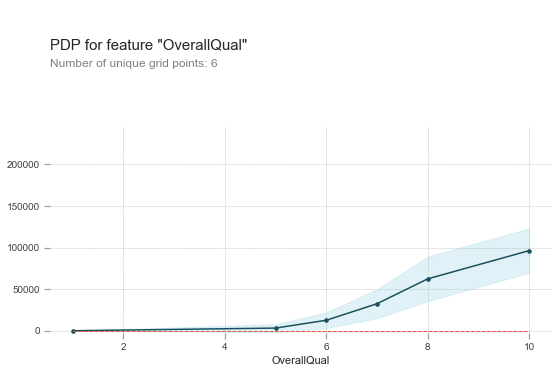

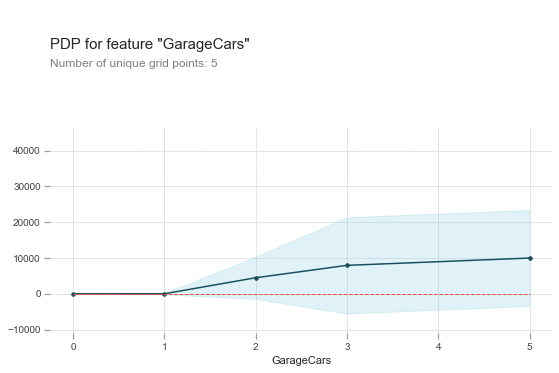

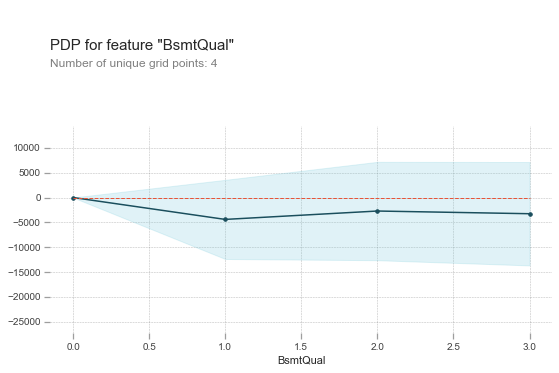

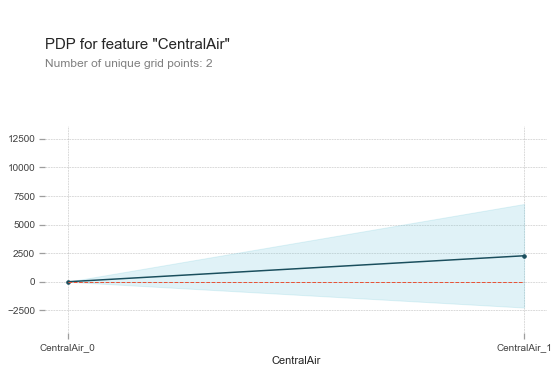

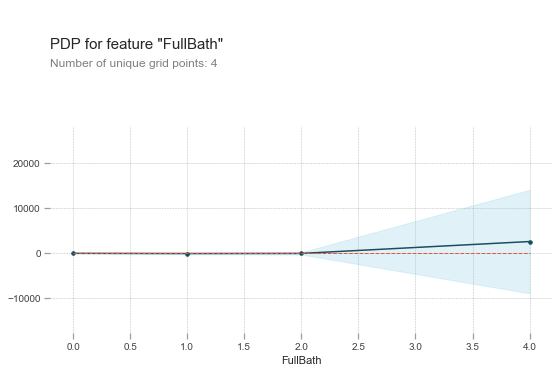

In [484]:
# Partial Dependency Plots

from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
features=["OverallQual","GarageCars","BsmtQual","CentralAir","FullBath"]
for feature in features:  
# Create the data that we will plot
    pdp_goals = pdp.pdp_isolate(model=regressor, dataset=X_test, model_features=X_test.columns, feature=feature)

    # plot it
    pdp.pdp_plot(pdp_goals, feature, figsize=(9,6))
    plt.show()

In [429]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [430]:
# Hyperparameter Tuning Using Random SearchCV

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score}

In [432]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [433]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   17.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  7.4min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, miss... scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None),
          fit_params=None, iid='warn', n_iter=50, n_jobs=4,
          param_distributions={'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'learning_rate': [0.05, 0.1, 0.15, 0.2], 'min_child_weight': [1, 2, 3, 4], 'booster': ['gbtree', 'gblinear'], 'base_score': [0.25, 0.5, 0.75, 1]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=5)

In [434]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=900, n_jobs=4, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [437]:
random_cv.best_params_

{'n_estimators': 900,
 'min_child_weight': 1,
 'max_depth': 2,
 'learning_rate': 0.1,
 'booster': 'gbtree',
 'base_score': 0.25}

In [438]:
# Best Parameters for tuning the model
XGB_params={'n_estimators': 900,
 'min_child_weight': 1,
 'max_depth': 2,
 'learning_rate': 0.1,
 'booster': 'gbtree',
 'base_score': 0.25}

In [441]:
regressor1=xgboost.XGBRegressor(**XGB_params)

In [443]:
regressor1.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=900, n_jobs=4, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [444]:
XGB_y_pred_after_tuning=regressor1.predict(X_test)

In [445]:
XGB_y_pred_after_tuning

array([117967.734, 164273.42 , 185541.78 , ..., 164534.16 , 118099.91 ,
       238681.62 ], dtype=float32)

In [ ]:
#r2_score(y_test, XGB_y_pred_after_tuning)

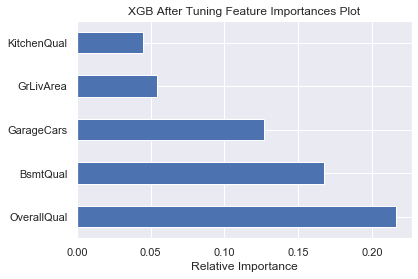

In [446]:
# Feature Importance Plot

plt.title('XGB After Tuning Feature Importances Plot')
plt.xlabel('Relative Importance')
feat_importances = pd.Series(regressor1.feature_importances_, index=X_test.columns)
feat_importances.nlargest(5).plot(kind='barh')

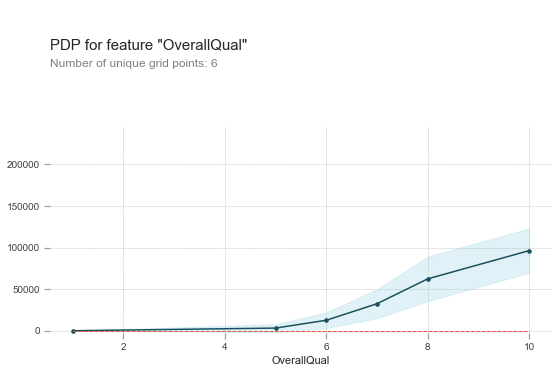

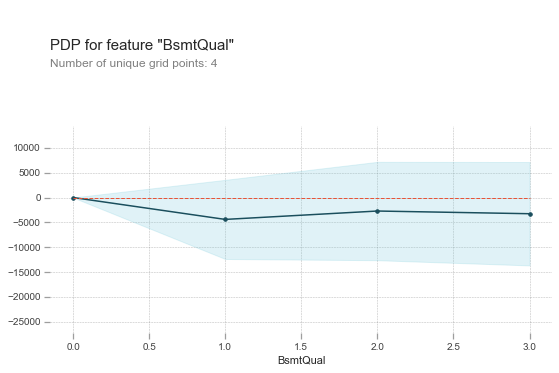

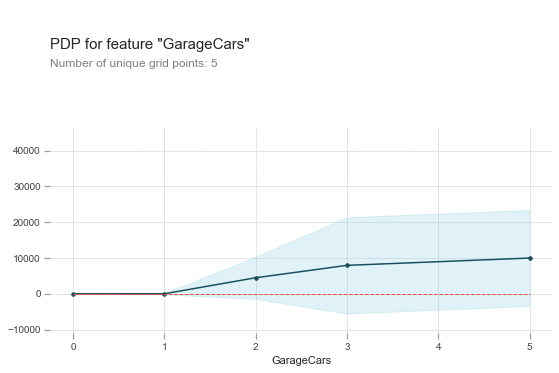

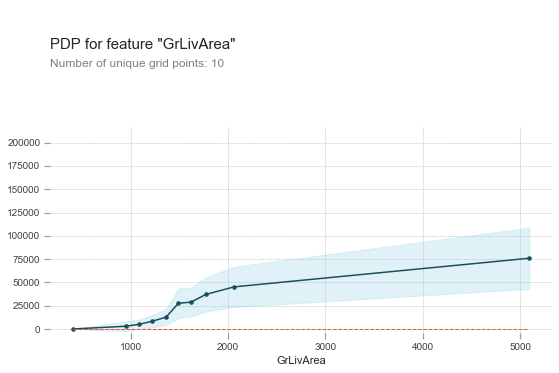

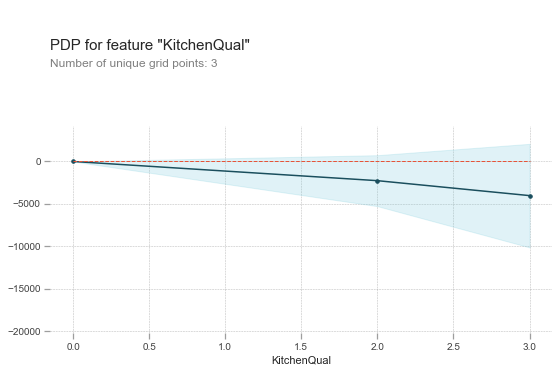

In [485]:
# Partial Dependency Plots

from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
features=["OverallQual","BsmtQual","GarageCars","GrLivArea","KitchenQual"]
for feature in features:  
# Create the data that we will plot
    pdp_goals = pdp.pdp_isolate(model=regressor, dataset=X_test, model_features=X_test.columns, feature=feature)

    # plot it
    pdp.pdp_plot(pdp_goals, feature, figsize=(9,6))
    plt.show()

In [449]:
# New Columns are created to assign the predicted values to the existing dataframe 

df_Test['y_pred']=y_pred
df_Test['y_pred_after_tuning']=y_pred_after_tuning
df_Test['XGB_y_pred']=XGB_y_pred
df_Test['XGB_y_pred_after_tuning']=XGB_y_pred_after_tuning

In [450]:
df_Test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice,y_pred,y_pred_after_tuning,XGB_y_pred,XGB_y_pred_after_tuning
1460,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.000000,1.0,730.0,140,0,0,0,120,0,0,6,2010,2,1,3,3,0,4,0,12,1,2,0,2,1,1,12,13,2,3,4,1,3,3,3,4,3,1,4,1,4,3,6,1,2,4,4,2,8,4,NaN,129552.75,127178.881614,119981.750000,117967.734375
1461,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.000000,1.0,312.0,393,36,0,0,0,0,12500,6,2010,3,1,0,3,0,0,0,12,2,2,0,2,3,1,13,14,1,3,4,1,3,3,3,0,5,1,4,1,4,2,6,1,2,4,4,2,8,4,NaN,157967.50,153369.455605,149717.015625,164273.421875
1462,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.000000,2.0,482.0,212,34,0,0,0,0,0,3,2010,3,1,0,3,0,4,0,8,2,2,0,5,1,1,12,13,2,3,4,2,2,3,3,2,5,1,2,1,4,3,6,1,0,4,4,2,8,4,NaN,182765.46,182262.663677,175973.656250,185541.781250
1463,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.000000,2.0,470.0,360,36,0,0,0,0,0,6,2010,3,1,0,3,0,4,0,8,2,2,0,5,1,1,12,13,1,3,4,2,3,3,3,2,5,1,0,1,4,2,6,1,0,4,4,2,8,4,NaN,181371.00,187895.570404,182169.453125,197616.906250
1464,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.000000,2.0,506.0,0,82,0,0,144,0,0,1,2010,3,1,0,1,0,4,0,22,2,2,4,2,1,1,6,6,2,2,4,2,2,3,3,0,5,1,0,1,4,2,6,1,1,4,4,2,8,4,NaN,201425.15,195875.895964,186681.312500,189874.281250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,1978.113406,0.0,0.0,0,0,0,0,0,0,0,6,2006,4,1,3,3,0,4,0,10,2,2,3,5,1,1,5,5,2,3,4,1,3,3,3,5,5,1,2,1,4,3,6,1,2,4,4,2,8,4,NaN,83500.50,89415.026009,85094.390625,76908.015625
2915,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.000000,1.0,286.0,0,24,0,0,0,0,0,4,2006,4,1,3,3,0,4,0,10,2,2,4,5,1,1,5,5,2,3,4,1,3,3,3,4,5,1,4,1,4,3,6,4,2,4,4,2,8,0,NaN,86454.11,90960.874439,74890.789062,80876.726562
2916,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.000000,2.0,576.0,474,0,0,0,0,0,0,9,2006,3,1,3,3,0,4,0,11,2,2,0,2,1,1,12,13,2,3,4,1,3,3,3,0,5,1,0,1,4,3,6,5,2,4,4,2,8,0,NaN,156908.62,162055.275336,172063.296875,164534.156250
2917,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,1978.113406,0.0,0.0,80,32,0,0,0,0,700,7,2006,3,1,3,3,0,4,0,11,2,2,0,6,1,1,6,15,2,3,4,2,2,3,0,2,5,1,4,1,4,3,6,1,2,4,4,2,8,4,NaN,114067.00,119004.372197,110234.718750,118099.906250


In [452]:
df6=df_Train.merge(df_Test,how='outer')
df6

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice,y_pred,y_pred_after_tuning,XGB_y_pred,XGB_y_pred_after_tuning
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.000000,2.0,548.0,0,61,0,0,0,0,0,2,2008,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,208500.0,NaN,NaN,NaN,NaN
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.000000,2.0,460.0,298,0,0,0,0,0,0,5,2007,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4,181500.0,NaN,NaN,NaN,NaN
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.000000,2.0,608.0,0,42,0,0,0,0,0,9,2008,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,223500.0,NaN,NaN,NaN,NaN
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.000000,3.0,642.0,0,35,272,0,0,0,0,2,2006,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0,140000.0,NaN,NaN,NaN,NaN
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.000000,3.0,836.0,192,84,0,0,0,0,0,12,2008,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,250000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,1978.113406,0.0,0.0,0,0,0,0,0,0,0,6,2006,4,1,3,3,0,4,0,10,2,2,3,5,1,1,5,5,2,3,4,1,3,3,3,5,5,1,2,1,4,3,6,1,2,4,4,2,8,4,NaN,83500.50,89415.026009,85094.390625,76908.015625
2915,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.000000,1.0,286.0,0,24,0,0,0,0,0,4,2006,4,1,3,3,0,4,0,10,2,2,4,5,1,1,5,5,2,3,4,1,3,3,3,4,5,1,4,1,4,3,6,4,2,4,4,2,8,0,NaN,86454.11,90960.874439,74890.789062,80876.726562
2916,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.000000,2.0,576.0,474,0,0,0,0,0,0,9,2006,3,1,3,3,0,4,0,11,2,2,0,2,1,1,12,13,2,3,4,1,3,3,3,0,5,1,0,1,4,3,6,5,2,4,4,2,8,0,NaN,156908.62,162055.275336,172063.296875,164534.156250
2917,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,1978.113406,0.0,0.0,80,32,0,0,0,0,700,7,2006,3,1,3,3,0,4,0,11,2,2,0,6,1,1,6,15,2,3,4,2,2,3,0,2,5,1,4,1,4,3,6,1,2,4,4,2,8,4,NaN,114067.00,119004.372197,110234.718750,118099.906250
